In [25]:
import pandas as pd
#starting with preprocessed & cleaned data

# Load the dataset
file_path = r'C:\Users\Trish\Downloads\Data (1).xlsx'
df = pd.read_excel(file_path)

#clean data by removing any leading and trailing spaces
df.columns = df.columns.str.strip()

# Inspect the first few rows of the data
df.head()

,Gender,Age,Race,Education,Platform,AI_usage,AI_usage_frequency,Response_time,Accuracy,Quality,...,Bias_category,Harmful_content,Harmful_content_type,Security,Overall_performance,New_features,Improvement,Ethical_considerations,Voice_assistants,Mimic_accent
0,Female,18-24,African,Bachelor's degree,Chat GPT (Open AI),No,Occasionally,16-20,2,3,...,NaN,No,NaN,No,4,NaN,NaN,NaN,Google Assistant,Yes
1,Female,18-24,African,Bachelor's degree,Chat GPT (Open AI),No,Occasionally,1-5,4,4,...,NaN,No,NaN,Yes,5,NaN,NaN,Age limit,Alexa,No
2,Female,18-24,African,Bachelor's degree,Chat GPT (Open AI),Yes,Daily,6-10,4,5,...,NaN,Yes,Deepfakes,No,4,-,Collect more information especially for ethnic...,Data security,"Siri, Bixby",Yes
3,Male,35-44,African,Master's degree,Chat GPT (Open AI),Yes,Daily,6-10,3,3,...,NaN,Yes,Misinformation,Yes,3,NaN,NaN,NaN,NaN,NaN
4,Male,18-24,African,Bachelor's degree,Chat GPT (Open AI),Yes,Daily,6-10,3,4,...,Cultural,Yes,Misinformation,No,4,Being able to create visualizations,Being trained with data from different catego...,Data security,Siri,Yes


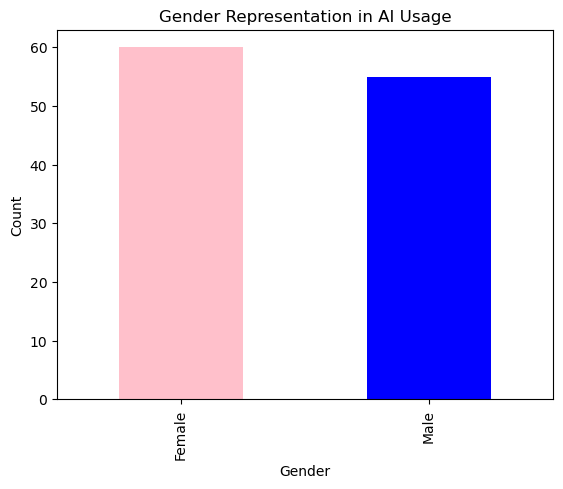

In [12]:
# Analyze the gender distribution
gender_counts = df['Gender'].value_counts()

# Visualize the gender distribution
import matplotlib.pyplot as plt

gender_counts.plot(kind='bar', color=['pink', 'blue'])
plt.title('Gender Representation in AI Usage')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


From the results above, we cannot go by gender count alone to prove the disparity in gender representation in GPT usage because the females are slightly more than the male in our dataset.

This can be explained by the fact that our team is composed of only females and our networks are majorly female hence the questionnaire was a bit more skewed towards the female gender.

That said, there are other instances in the dataset that will prove the glaring gap in the adoption of GPTs by the african race, especially the female gender.

We intend to collect more data in the future and publish a paper to empower more women, especially of the africanrace, to utilize generative AI, bridge the gender gap, and raise awareness about the potential biases and harms associated with these systems.   

# Average AI Usage Frequency by Gender

In [15]:

# Mapping for AI usage frequency
frequency_mapping = {
    'Daily': 4,
    'Weekly': 3,
    'Occasionally': 2,
    'Monthly': 1
}

# Apply the mapping to the 'AI_usage_frequency' column
df['AI_usage_frequency_numeric'] = df['AI_usage_frequency'].map(frequency_mapping)

# Inspect the updated DataFrame with the numeric values
df[['AI_usage_frequency', 'AI_usage_frequency_numeric']].head()


,AI_usage_frequency,AI_usage_frequency_numeric
0,Occasionally,3
1,Occasionally,3
2,Daily,5
3,Daily,5
4,Daily,5


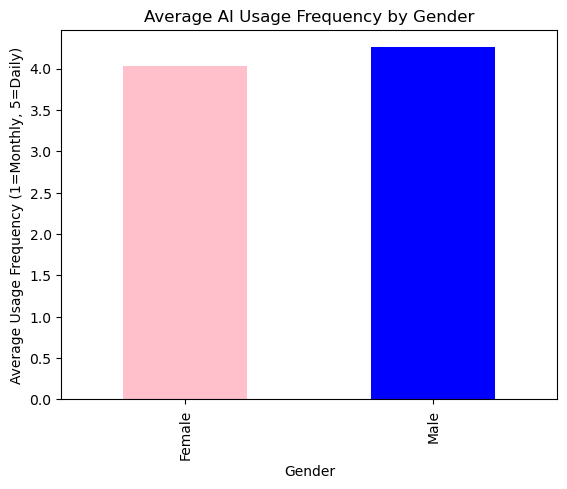

In [17]:
# Group by gender and calculate the average AI usage frequency
usage_by_gender = df.groupby('Gender')['AI_usage_frequency_numeric'].mean()

# Visualize the average AI usage frequency by gender
import matplotlib.pyplot as plt

usage_by_gender.plot(kind='bar', color=['pink', 'blue'])
plt.title('Average AI Usage Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Usage Frequency (1=Monthly, 5=Daily)')
plt.show()


Going by the mean, more males use Generative AI frequently in comparison to females.

However, the visualization above is not enough as the differences are still very slight. 

# T-test

In [18]:
from scipy import stats

# Separate AI usage frequency by gender
male_usage_freq = df[df['Gender'] == 'Male']['AI_usage_frequency_numeric']
female_usage_freq = df[df['Gender'] == 'Female']['AI_usage_frequency_numeric']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(male_usage_freq, female_usage_freq)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 1.371396216967568, P-value: 0.17296861554541318


The p_value is greater than 0.05...actually, it is way higher. Unfortunately this does not show a significant disparity.

The T-test here uses continous variables (numeric). 

Next step was to try another statistical test that uses categorical variables.


# Chi-Square Test

In [19]:
from scipy.stats import chi2_contingency

# Cross-tabulate gender and AI usage (yes/no)
contingency_table = pd.crosstab(df['Gender'], df['AI_usage'])

# Perform chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, P-value: {p}")


Chi-Square Statistic: 5.0205940452916265, P-value: 0.02504757451632235


This test measures how much the observed frequencies deviate from the expected frequencies (if there were no relationship between the variables).
A larger value indicates a greater difference between the observed and expected frequencies.

The **Chi-square test** is a better interpretation of the relationship between the gender of the users and their likelihood to use AI.

Chi-Square Statistic of 5.0205940452916265 indicates that there is a significant relationship between the gender of the user and their likelihood to use AI.

The **P-value** is under 0.05 which indicates a significant disparity. 

Now that we are onto something, we test how the results are skewed to a certain gender.





In [21]:
import statsmodels.api as sm

# Encode categorical variables
df['Gender_encoded'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)  
df['AI_usage_encoded'] = df['AI_usage'].apply(lambda x: 1 if x == 'Yes' else 0) 

# Define independent and dependent variables
X = df[['Gender_encoded']]
y = df['AI_usage_encoded']

# Add constant to predictor variables
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Summary of the regression results
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.556002
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       AI_usage_encoded   No. Observations:                  115
Model:                          Logit   Df Residuals:                      113
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                 0.04602
Time:                        10:53:58   Log-Likelihood:                -63.940
converged:                       True   LL-Null:                       -67.025
Covariance Type:            nonrobust   LLR p-value:                   0.01300
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.6314      0.364      4.476      0.000       0.917       2.346
Gender_encoded   

I have done an improved version of this code below because it was easier for me to interpret the oods ratio than it was to interpret the logs odd ratio in the regression results above.

In [26]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Encode categorical variables
df['Gender_encoded'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)  
df['AI_usage_encoded'] = df['AI_usage'].apply(lambda x: 1 if x == 'Yes' else 0)  
df['Security_encoded'] = df['Security'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define independent and dependent variables
X = df[['Gender_encoded', 'Accuracy', 'Security_encoded']]
y = df['AI_usage_encoded']

# Add constant to predictor variables
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Summary of the regression results
print(result.summary())

# Calculate and display odds ratios
odds_ratios = np.exp(result.params)
print("\nOdds Ratios:\n", odds_ratios)


Optimization terminated successfully.
         Current function value: 0.553061
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       AI_usage_encoded   No. Observations:                  115
Model:                          Logit   Df Residuals:                      111
Method:                           MLE   Df Model:                            3
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                 0.05107
Time:                        11:11:36   Log-Likelihood:                -63.602
converged:                       True   LL-Null:                       -67.025
Covariance Type:            nonrobust   LLR p-value:                   0.07698
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8149      1.135      0.718      0.473      -1.410       3.040
Gender_enco

The results from adding variables like security and Accuracy were not as statistically significant so I did a different code with Gender and AI_usage variables only

In [27]:
# Encode categorical variables
df['Gender_encoded'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)  
df['AI_usage_encoded'] = df['AI_usage'].apply(lambda x: 1 if x == 'Yes' else 0) 

# Define independent and dependent variables 
X = df[['Gender_encoded']] 
y = df['AI_usage_encoded']

# Add constant to predictor variables
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Summary of the regression results
print(result.summary())

# Calculate Odds Ratios
odds_ratios = pd.Series(result.params).apply(lambda x: round(np.exp(x), 3))
print("\nOdds Ratios:")
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.556002
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       AI_usage_encoded   No. Observations:                  115
Model:                          Logit   Df Residuals:                      113
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                 0.04602
Time:                        11:16:44   Log-Likelihood:                -63.940
converged:                       True   LL-Null:                       -67.025
Covariance Type:            nonrobust   LLR p-value:                   0.01300
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.6314      0.364      4.476      0.000       0.917       2.346
Gender_encoded   

The logistic regression gives a better insight into the likelihood of using AI based on gender.

To note: Gender encoded variable is the female gender

The p-value for the Gender_encoded variable is **0.016**, which is less than the common significance level of 0.05. This suggests that the gender variable is statistically significant in predicting AI usage, meaning that there is evidence to reject the null hypothesis that gender has no effect on AI usage.

The Odds Ratio for Gender_encoded  is **0.338** which means that females are less likely to use AI compared to males when other factors like Age and Education are held constant. Females have about **66.2%** lower odds of using AI compared to males.


Now that we have proven that Males are more likely to use age than females, the next step is to work on the biases experienced in AI usage by Africans.

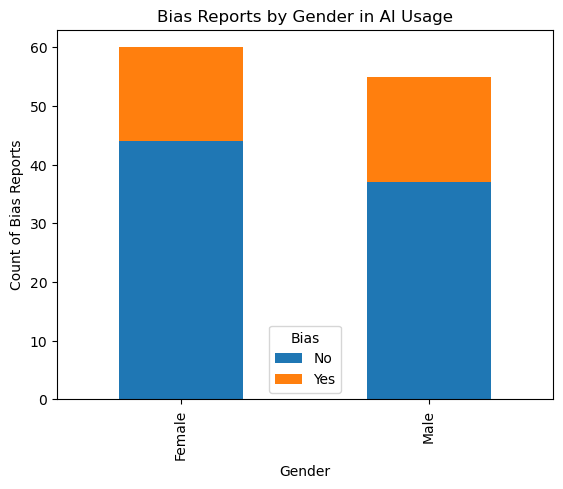

In [28]:
# Group by gender and analyze bias occurrence
bias_by_gender = df.groupby('Gender')['Bias'].value_counts()

# Visualize the bias reports by gender
bias_by_gender.unstack().plot(kind='bar', stacked=True)
plt.title('Bias Reports by Gender in AI Usage')
plt.xlabel('Gender')
plt.ylabel('Count of Bias Reports')
plt.show()


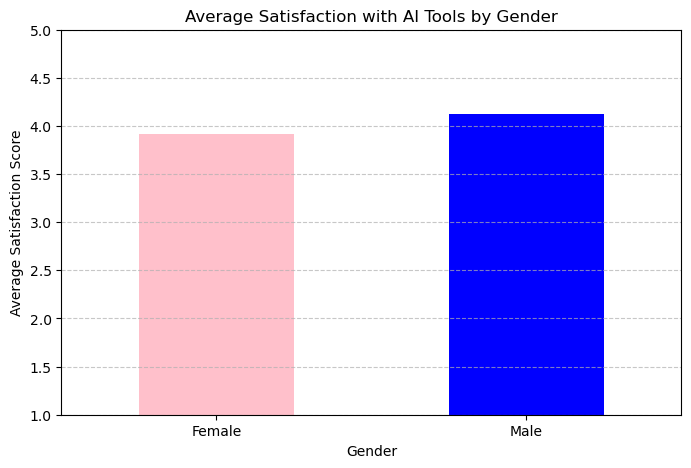

In [32]:
# Define the mapping from satisfaction levels to numerical scores
satisfaction_mapping = {
    'Very dissatisfied': 1,
    'Dissatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Very satisfied': 5
}

# Map the Satisfaction column to numerical scores
df['Satisfaction_numeric'] = df['Satisfaction'].map(satisfaction_mapping)

# Check for any unmapped values
unmapped_values = df['Satisfaction'][df['Satisfaction_numeric'].isnull()].unique()
if len(unmapped_values) > 0:
    print("Unmapped Satisfaction Levels:", unmapped_values)

# Calculate the average satisfaction score by gender
satisfaction_by_gender = df.groupby('Gender')['Satisfaction_numeric'].mean()

# Visualize the average satisfaction by gender
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
satisfaction_by_gender.plot(kind='bar', color=['pink', 'blue'])
plt.title('Average Satisfaction with AI Tools by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation=0)
plt.ylim(1, 5)  # Set y-axis limits to match the satisfaction scale
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


From the above satisfaction score, Male users are, on average, more satisfied than the female users of GPTs.

In [35]:
pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 445.2 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/626.3 kB 657.6 kB/s eta 0:00:01
   --------- ---------------------------- 163.8/626.3 kB 984.6 kB/s eta 0:00:01
   ----------------- ---------------------- 276.5/626.3 kB 1.3 MB/s eta 0:00:01
   ------------------------------- -------- 491.5/626.3 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


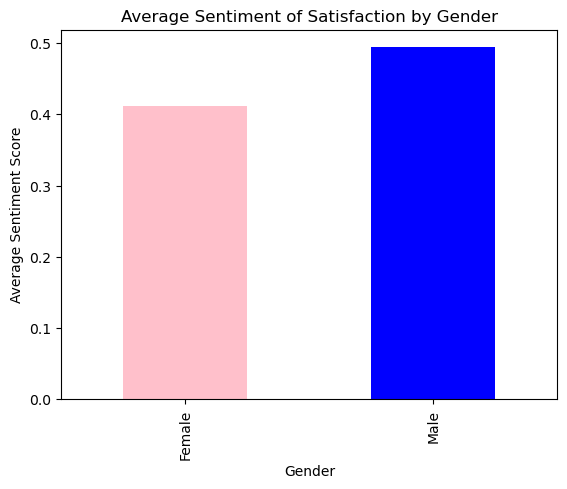

In [39]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis on the Satisfaction column
df['sentiment'] = df['Satisfaction'].apply(get_sentiment)

# Group sentiment by gender
sentiment_by_gender = df.groupby('Gender')['sentiment'].mean()

# Visualize the average sentiment score by gender
sentiment_by_gender.plot(kind='bar', color=['pink', 'blue'])
plt.title('Average Sentiment of Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Sentiment Score')
plt.show()


The sentiment analysis using the TextBlob module supports the satisfaction analysis we did above. More male users are satisfied by GPTs in comparison to their female counterparts.

In [49]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 563.7 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


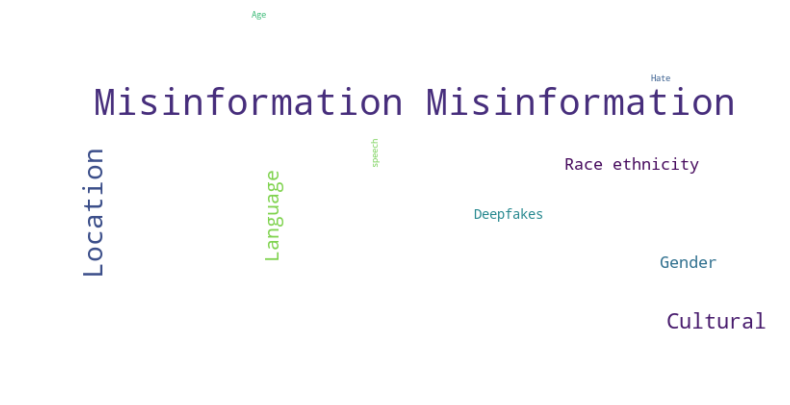

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate text from bias category and harmful content type for analysis
text_data = ' '.join(df['Bias_category'].dropna().astype(str)) + ' ' + ' '.join(df['Harmful_content_type'].dropna().astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [51]:
pip install semopy


Note: you may need to restart the kernel to use updated packages.Collecting semopy
     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
      --------------------------------------- 0.0/1.6 MB 330.3 kB/s eta 0:00:05
     - -------------------------------------- 0.0/1.6 MB 326.8 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/1.6 MB 656.4 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.6 MB 981.9 kB/s eta 0:00:02
     --------- ------------------------------ 0.4/1.6 MB 1.4 MB/s eta 0:00:01
     ------------ --------------------------- 0.5/1.6 MB 1.7 MB/s eta 0:00:01
     ---------------------- ----------------- 0.9/1.6 MB 2.6 MB/s eta 0:00:01
     ---------------------------- ----------- 1.1/1.6 MB 3.0 MB/s eta 0:00:01
     ------------------------------ --------- 1.2/1.6 MB 2.8 MB/s eta 0:00:01
     ------------------------------------ --- 1.5/1.6 MB 3.1 MB/s


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import pandas as pd
from semopy import Model

# Encode AI_usage and Security 
df['AI_usage_encoded'] = df['AI_usage'].map({'No': 0, 'Yes': 1})
df['Security_encoded'] = df['Security'].map({'No': 0, 'Yes': 1})

# Define the SEM model
model_desc = '''
  AI_usage_encoded ~ Accuracy + Security_encoded
  Accuracy ~~ Accuracy
'''

# Prepare data 
model_data = df[['AI_usage_encoded', 'Accuracy', 'Security_encoded']].dropna()

# Fit the SEM model
model = Model(model_desc)
model.fit(model_data)

# Output the model summary
print(model.inspect())


               lval  op              rval  Estimate  Std. Err   z-value  \
0  AI_usage_encoded   ~          Accuracy  0.141412  0.172650  0.819065   
1  AI_usage_encoded   ~  Security_encoded -0.532954  0.271158 -1.965474   
2          Accuracy  ~~          Accuracy  0.611570  0.237751  2.572313   
3  AI_usage_encoded  ~~  AI_usage_encoded  0.182823  0.077956  2.345208   

    p-value  
0  0.412750  
1  0.049359  
2  0.010102  
3  0.019016  


For Security Encoded: The p-value is **0.049359** just below 0.05, indicating that this relationship is statistically significant. This implies that perceptions of security may negatively impact the use of AI. If users feel insecure about the AI, they are less likely to use it. 

However, for Accuracy, the P-value of **0.412750** there is no significant relationship between Accuracy and AI usage


In [70]:
import pandas as pd
from semopy import Model

# Load the dataset
file_path = r'C:\Users\Trish\Downloads\Data (1).xlsx'
df = pd.read_excel(file_path)

#clean data by removing any leading and trailing spaces
df.columns = df.columns.str.strip()

# Encode AI_usage and Bias
df['AI_usage_encoded'] = df['AI_usage'].map({'No': 0, 'Yes': 1})
df['Bias_encoded'] = df['Bias'].map({'No': 0, 'Yes': 1})

# Prepare the data
model_data = df[['AI_usage_encoded', 'Quality', 'Bias_encoded']].dropna()

# Define the SEM model
model_desc = '''
  AI_usage_encoded ~ Quality + Bias_encoded
'''

# Fit the SEM model
model = Model(model_desc)
model.fit(model_data)

# Output the model summary
print(model.inspect())


               lval  op              rval  Estimate  Std. Err   z-value  \
0  AI_usage_encoded   ~           Quality -0.020929  0.058333 -0.358789   
1  AI_usage_encoded   ~      Bias_encoded  0.174746  0.089202  1.958997   
2  AI_usage_encoded  ~~  AI_usage_encoded  0.190409  0.025110  7.582875   

        p-value  
0  7.197529e-01  
1  5.011318e-02  
2  3.375078e-14  


**(Quality (p-value = 0.719753)**: This p-value indicates no significant relationship between quality and AI usage. Users' perceptions of quality do not significantly influence their likelihood of using AI.

**Bias_encoded (p-value = 0.050113)**: This p-value is very close to the 0.05 threshold, suggesting a significant relationship. It implies that perceptions of bias may positively impact the use of AI, although the evidence is weaker compared to the security aspect.